## Intervalos de confianza y predicción en una regresión lineal

Para realizar este ejercicio utilizaremos los datos del paquete **mtcars**, en **R** (no requiere ningún paquete adicional)

Del set de datos trabajaremos con las siguientes variables:

* $Y$ = mpg (millas por galon)
* $X$ = wt (peso del motor).

Consideremos solo estas variables del dataset ($Y$ = millas_por_galon y $X$ = peso_motor) para poder visualizar gráficamente los intervalos pedidos.

Se pide realizar una regresión lineal de Y sobre X y luego: 

**1.** Calcular, para cada punto del diseño, el **intervalo de confianza** de nivel 0.95 para la respuesta.

**2.** Calcular, para cada punto del diseño, el **intervalo de predicción** de nivel 0.95 para la respuesta.

**3.** Realizar en un mismo gráfico los pares de puntos (x,y), la recta de mínimos cuadrados y los límites de los intervalos obtenidos en 1. y 2. para cada punto del diseño.

**4.** Calcular, para cada punto del diseno, el i**ntervalo de confianza** para la respuesta de manera que el **nivel global** de los 32 intervalos obtenidos sea 0.95.

**5.** Agregar al gráfico obtenido en 3. las **bandas de confianza** calculadas en 4.

**Empezamos importando los paquetes que vamos a utilizar para realizar los gráficos**

In [1]:
library(ggplot2)
library(GGally)

**Mostramos una visualización del data frame con el que trabajaremos (sólo algunas filas)**

In [2]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


**Realizamos el ajuste lineal entre las variables que nos interesan que son: $Y$ = millas_por_galon y $X$ = peso_motor** 

In [3]:
millas_por_galon = mtcars$mpg
peso_motor = mtcars$wt

In [4]:
regresion_lineal <- lm(millas_por_galon~peso_motor, data = mtcars)

##  **1) Calcular, para cada punto del diseño, el intervalo de confianza de nivel 0.95 para la respuesta.**

Lo que hacemos en este punto es:

**Una vez obtenida la recta de regresión**, hacemos de cuenta que observamos nuevamente los mismos valores de peso del motor de los autos que ya vimos. 

Para cada uno de estos valores queremos crear un intervalo de confianza que nos asegure en un 95% que el **<u>valor esperado</u>** para la respuesta (es decir para las millas por galón) se encuentre en ese intervalo.

Esto lo hacemos fácilmente con la función **predict** e indicando es el intervalo es de **"confidence"**.

In [5]:
intervalos_confianza <-predict(regresion_lineal, interval = "confidence", level = 0.95)
head(intervalos_confianza)

,fit,lwr,upr
Mazda RX4,23.28261,21.98867,24.57655
Mazda RX4 Wag,21.91977,20.75275,23.08679
Datsun 710,24.88595,23.38301,26.38890
Hornet 4 Drive,20.10265,19.00300,21.20230
Hornet Sportabout,18.90014,17.77147,20.02882
Valiant,18.79325,17.65922,19.92729


**Convertimos la matriz anterior a un dataframe para poder utilizar ggplot y obtener una visualización de los intervalos obtenidos, además la concatenamos con las columnas de millas por galón y de peso del motor del dataset.**

In [6]:
intervalos_confianza_df <- data.frame(cbind(peso_motor,millas_por_galon, intervalos_confianza))

**Realizamos los graficos**

`geom_smooth()` using formula 'y ~ x'



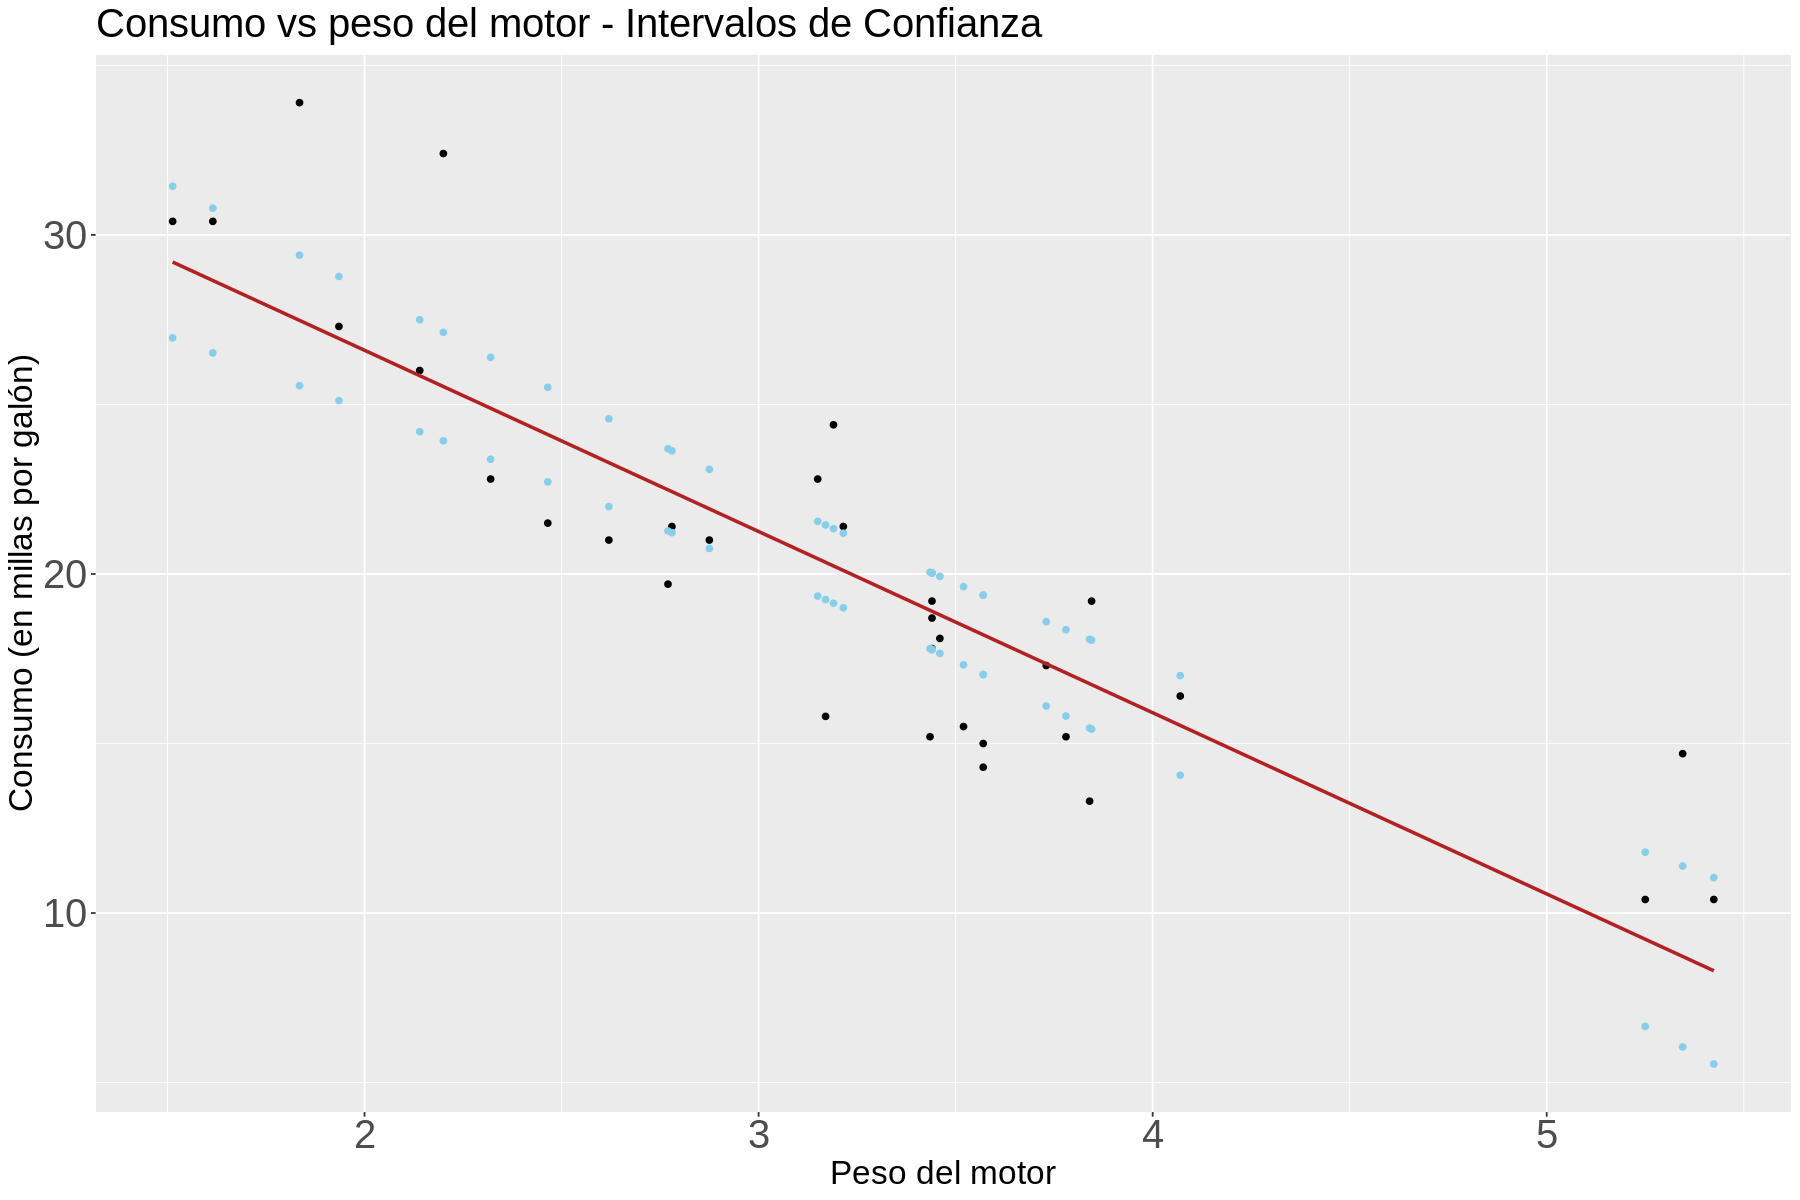

In [7]:
g<-ggplot(intervalos_confianza_df)+
  geom_point(aes(x=peso_motor,y=millas_por_galon))+ #Son los puntos con los que realizo la regresión
  geom_point(aes(x=peso_motor,y=lwr), col="skyblue")+ #Cotas inferiores de los IC  
  geom_point(aes(x=peso_motor,y=upr), col="skyblue")+ #Cotas superiores de los IC
  geom_smooth(aes(x=peso_motor, y=millas_por_galon), method="lm", col="firebrick", se=FALSE) + #Grafica la recta de mínimos cuadrados (smooth indica linea continua)
  labs(title="Consumo vs peso del motor - Intervalos de Confianza", y="Consumo (en millas por galón)", x="Peso del motor") + 
  theme(title=element_text(size=20),axis.title=element_text(size=20),text = element_text(size=30))  #Tamanio de titulo y ejes

  options(repr.plot.width = 15, repr.plot.height = 10) #Setting de ancho y alto del plot

g

**Observamos que tenemos 2 puntos celestes por cada punto negro. Esto es porque construimos los intervalos de confianza suponiendo que las nuevas observaciones obtenidas coinciden con las observaciones que tuvimos previamente (las que utilizamos para realizar la regresión)**

**Ahora, en el mismo gráfico anterior, unimos los puntos de los intervalos de confianza con líneas**

`geom_smooth()` using formula 'y ~ x'



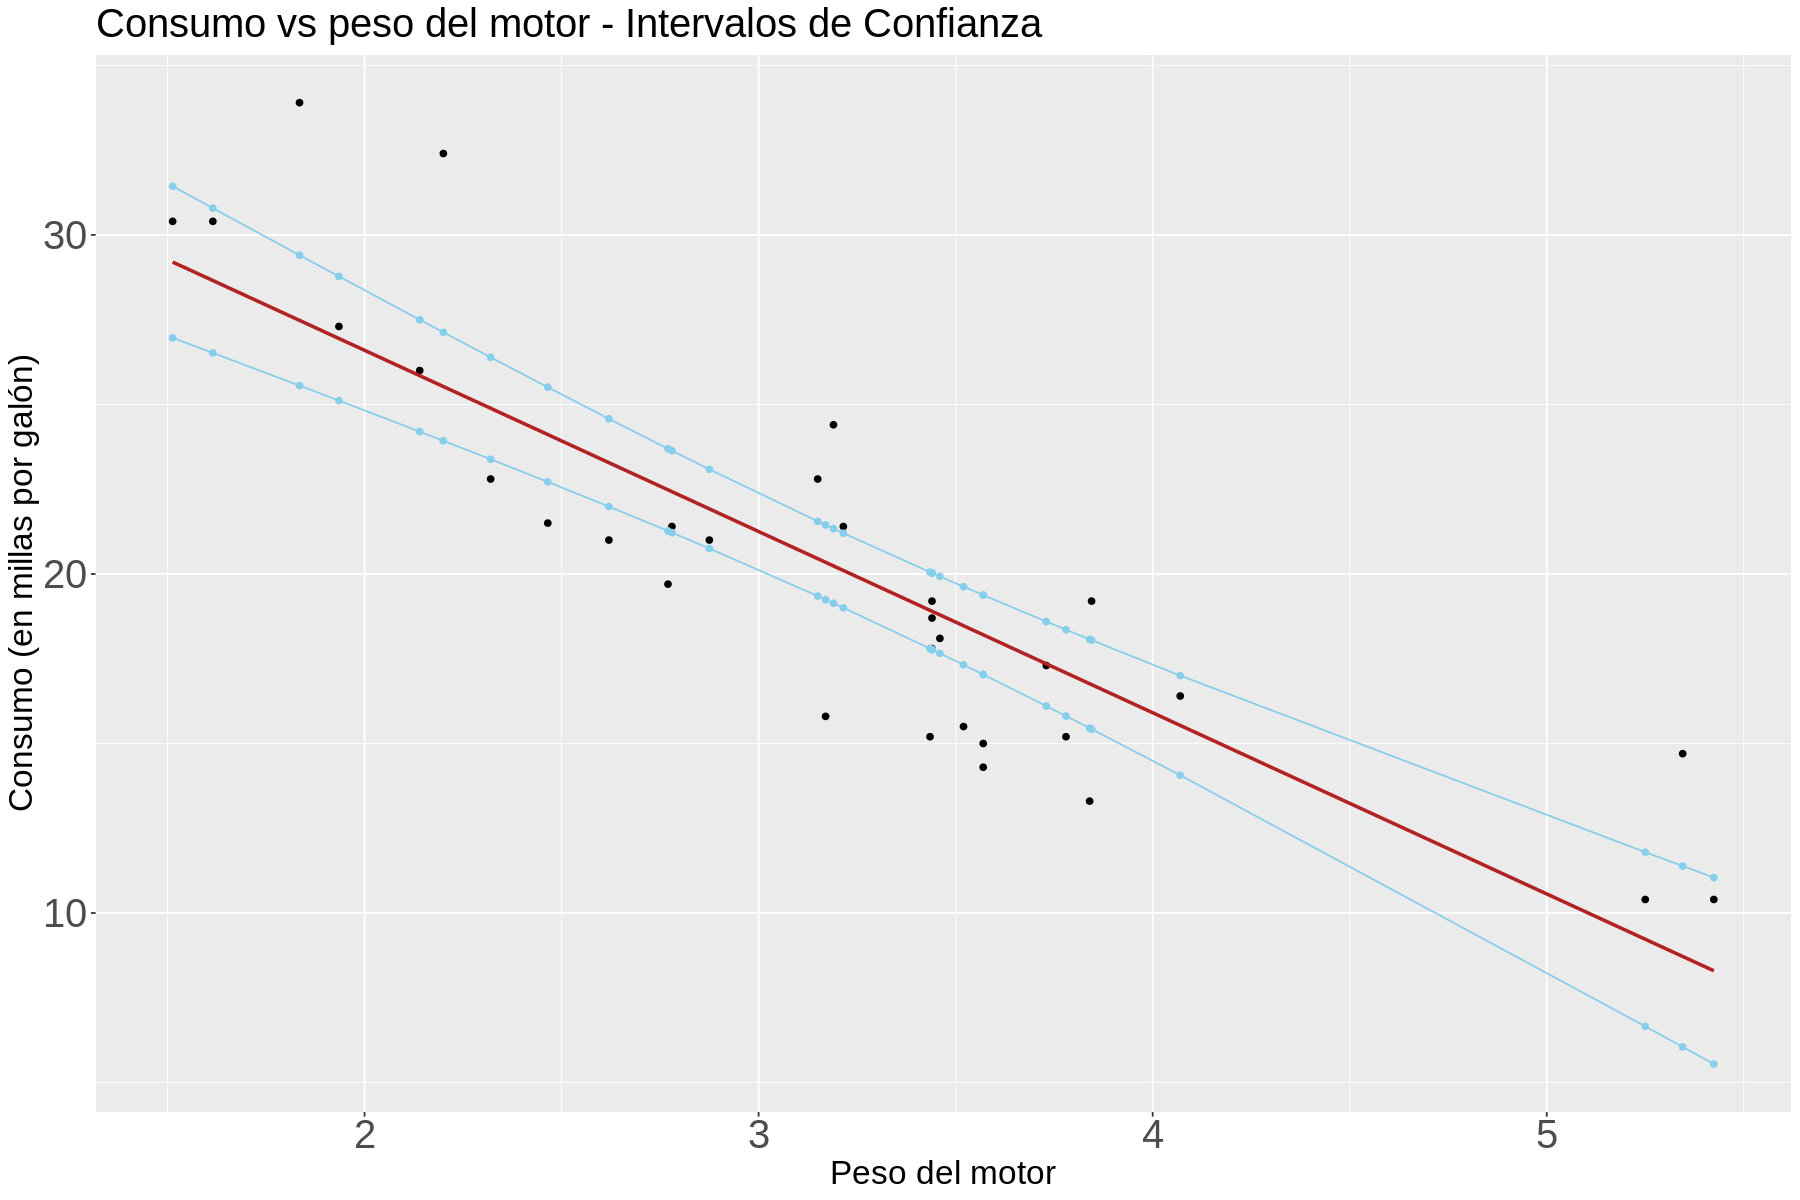

In [8]:
g <- g + geom_line(aes(x=peso_motor,y=upr), col="skyblue")+ #Une a las cotas inferiores de los IC con lineas  
         geom_line(aes(x=peso_motor,y=lwr), col="skyblue") #Une a las cotas superiores de los IC con lineas
 
g

El gráfico anterior nos muestra que para nuevas observaciones de pesos de motor, **el valor esperado** de las respuestas en consumo que obtengamos estarán con un 95% de seguridad dentro de las bandas azules. 

## 2) Calcular, para cada punto del diseño, el intervalo de predicción de nivel 0.95 para la respuesta

Buscamos ahora **intervalos de predicción** para **la respuesta** en consumo **(y no para su valor esperado)**. Recordemos que nos basaremos en predecir la respuesta suponiendo que volvemos a observar los valores incialmente observados y que fueron utilizados para realizar la regresión.

In [9]:
intervalos_prediccion <-predict(regresion_lineal ,interval = "prediction", level = 0.95)
head(intervalos_prediccion)

Warning message in predict.lm(regresion_lineal, interval = "prediction", level = 0.95):
“predictions on current data refer to _future_ responses
”


,fit,lwr,upr
Mazda RX4,23.28261,16.92894,29.63628
Mazda RX4 Wag,21.91977,15.59072,28.24882
Datsun 710,24.88595,18.48644,31.28546
Hornet 4 Drive,20.10265,13.78568,26.41962
Hornet Sportabout,18.90014,12.57806,25.22223
Valiant,18.79325,12.47021,25.11630


## 3. Realizar en un mismo gráfico los pares de puntos (x,y), la recta de mínimos cuadrados y los límites de los intervalos obtenidos en 1. y 2. para cada punto del diseño.

In [10]:
intervalos_prediccion_df <- data.frame(cbind(peso_motor,millas_por_galon,intervalos_prediccion))

`geom_smooth()` using formula 'y ~ x'



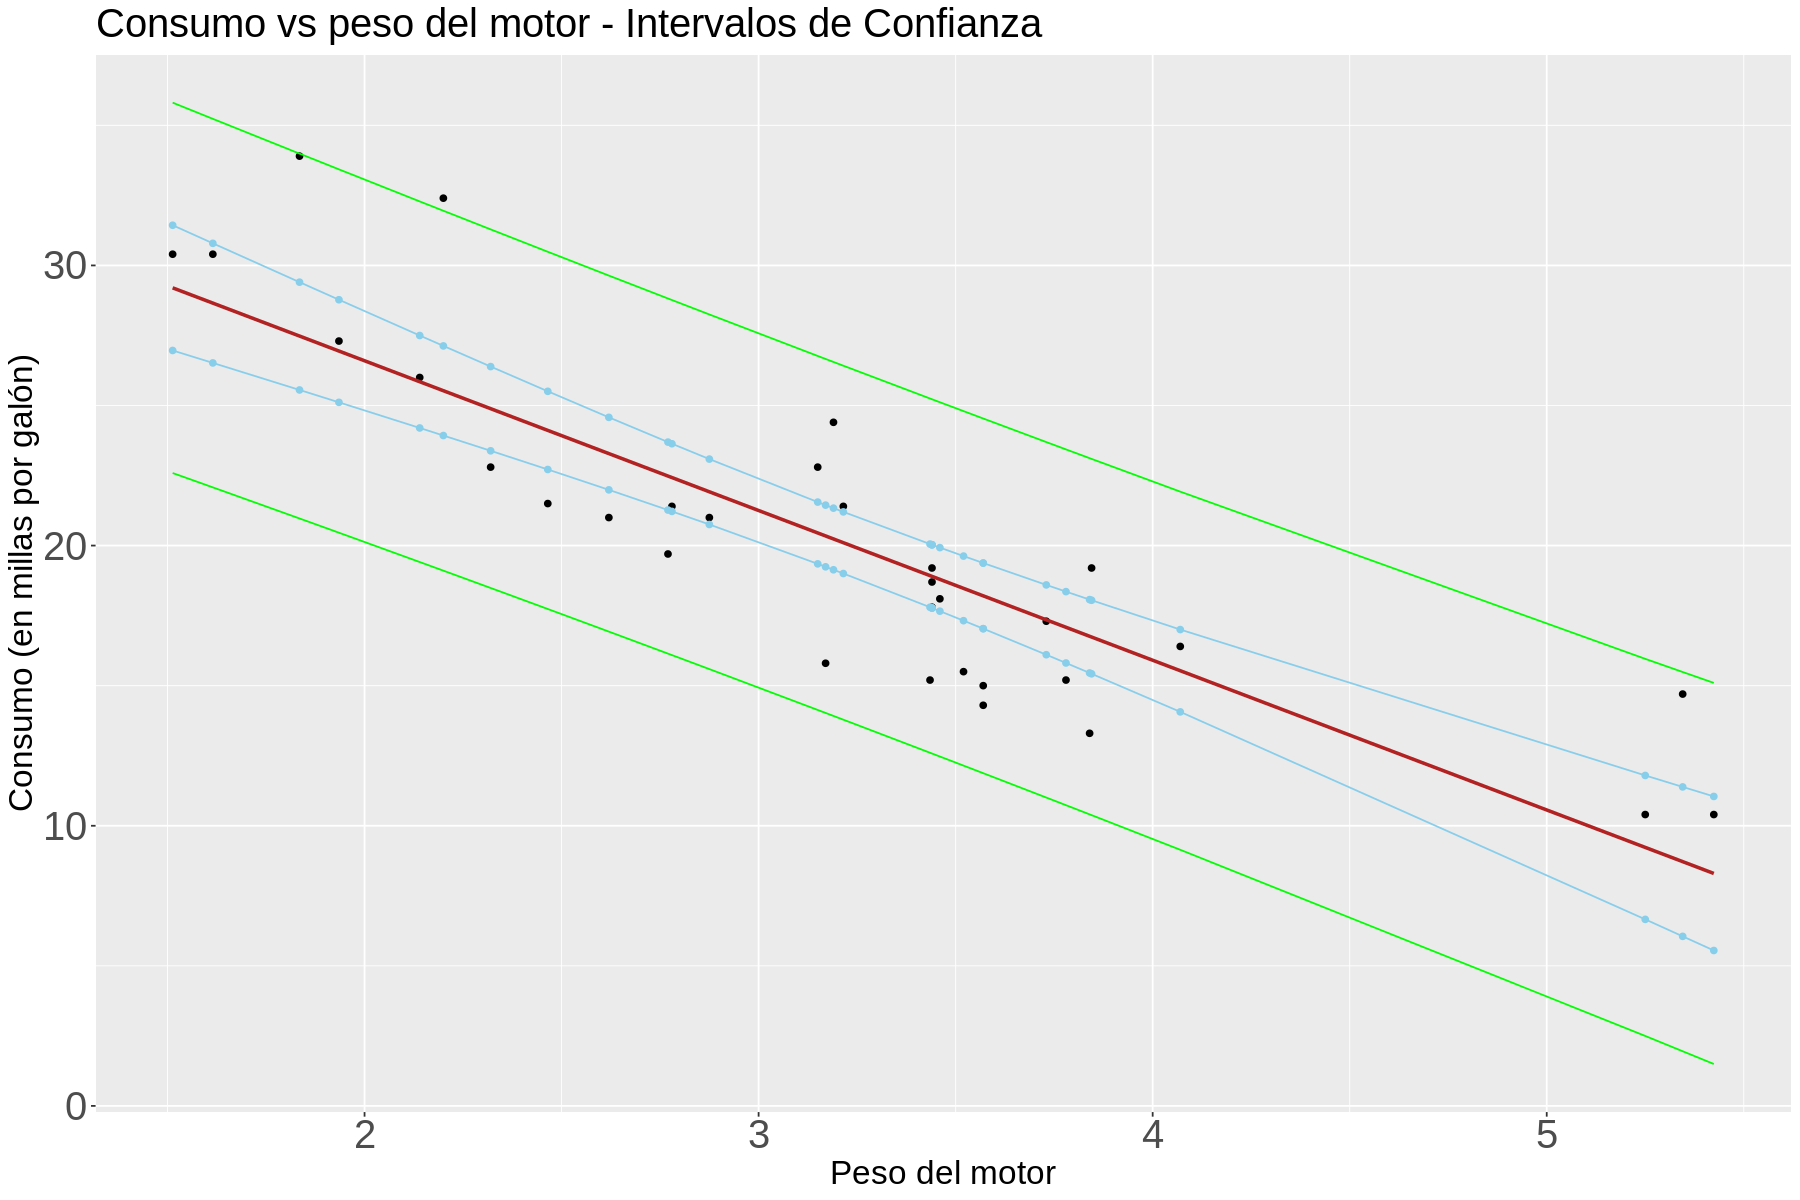

In [11]:
g <- g + geom_line(data = intervalos_prediccion_df, aes(x=peso_motor,y=lwr), col="green")+ #Une a las cotas inferiores de los IC con lineas  
  geom_line(data = intervalos_prediccion_df, aes(x=peso_motor,y=upr), col="green") #Une a las cotas superiores de los IC con lineas

g

Claramente los **intervalos de predicción para la respuesta** son mucho mas anchos que los de **confianza para el valor esperado de la respuesta.** Esto se debe a que es mucho más ambicioso estimar bien la respuesta que su valor esperado.

## 4) Calcular, para cada punto del diseño, el intervalo de confianza para la respuesta de manera que el nivel global de los 32 intervalos obtenidos sea 0.95.

Para hallar **bandas de confianza** debemos hacerlo con las cuentas que se deducen de la teoría:

In [12]:
n <- nrow(mtcars)
X <- model.matrix(regresion_lineal)
A <- solve(t(X) %*% X)
p <- ncol(X)
cuantil_f <- qf(0.95,p,n-p)
s2 <- summary(regresion_lineal)$sigma^2

In [13]:
bandas_confianza <- matrix(0, nrow = n, ncol=2)

for(i in 1:n){
  yi_hat = regresion_lineal$fitted.values[i] #valor predicho
    
  cota_inferior <- yi_hat - sqrt(p * cuantil_f) * sqrt(s2 * (1 + t(X[i,]) %*% A %*% X[i,]))
  cota_superior <- yi_hat + sqrt(p * cuantil_f) * sqrt(s2 * (1+  t(X[i,]) %*% A %*% X[i,]))
  bandas_confianza[i,] <- c(cota_inferior, cota_superior)
             
}

In [14]:
bandas_confianza_df <- data.frame(cbind(peso_motor, millas_por_galon, bandas_confianza))
names(bandas_confianza_df) <- c('peso_motor', 'millas_por_galon', 'lwr', 'upr')

## 5) Agregar al gráfico obtenido en 3) las bandas de confianza calculadas en 4)

`geom_smooth()` using formula 'y ~ x'



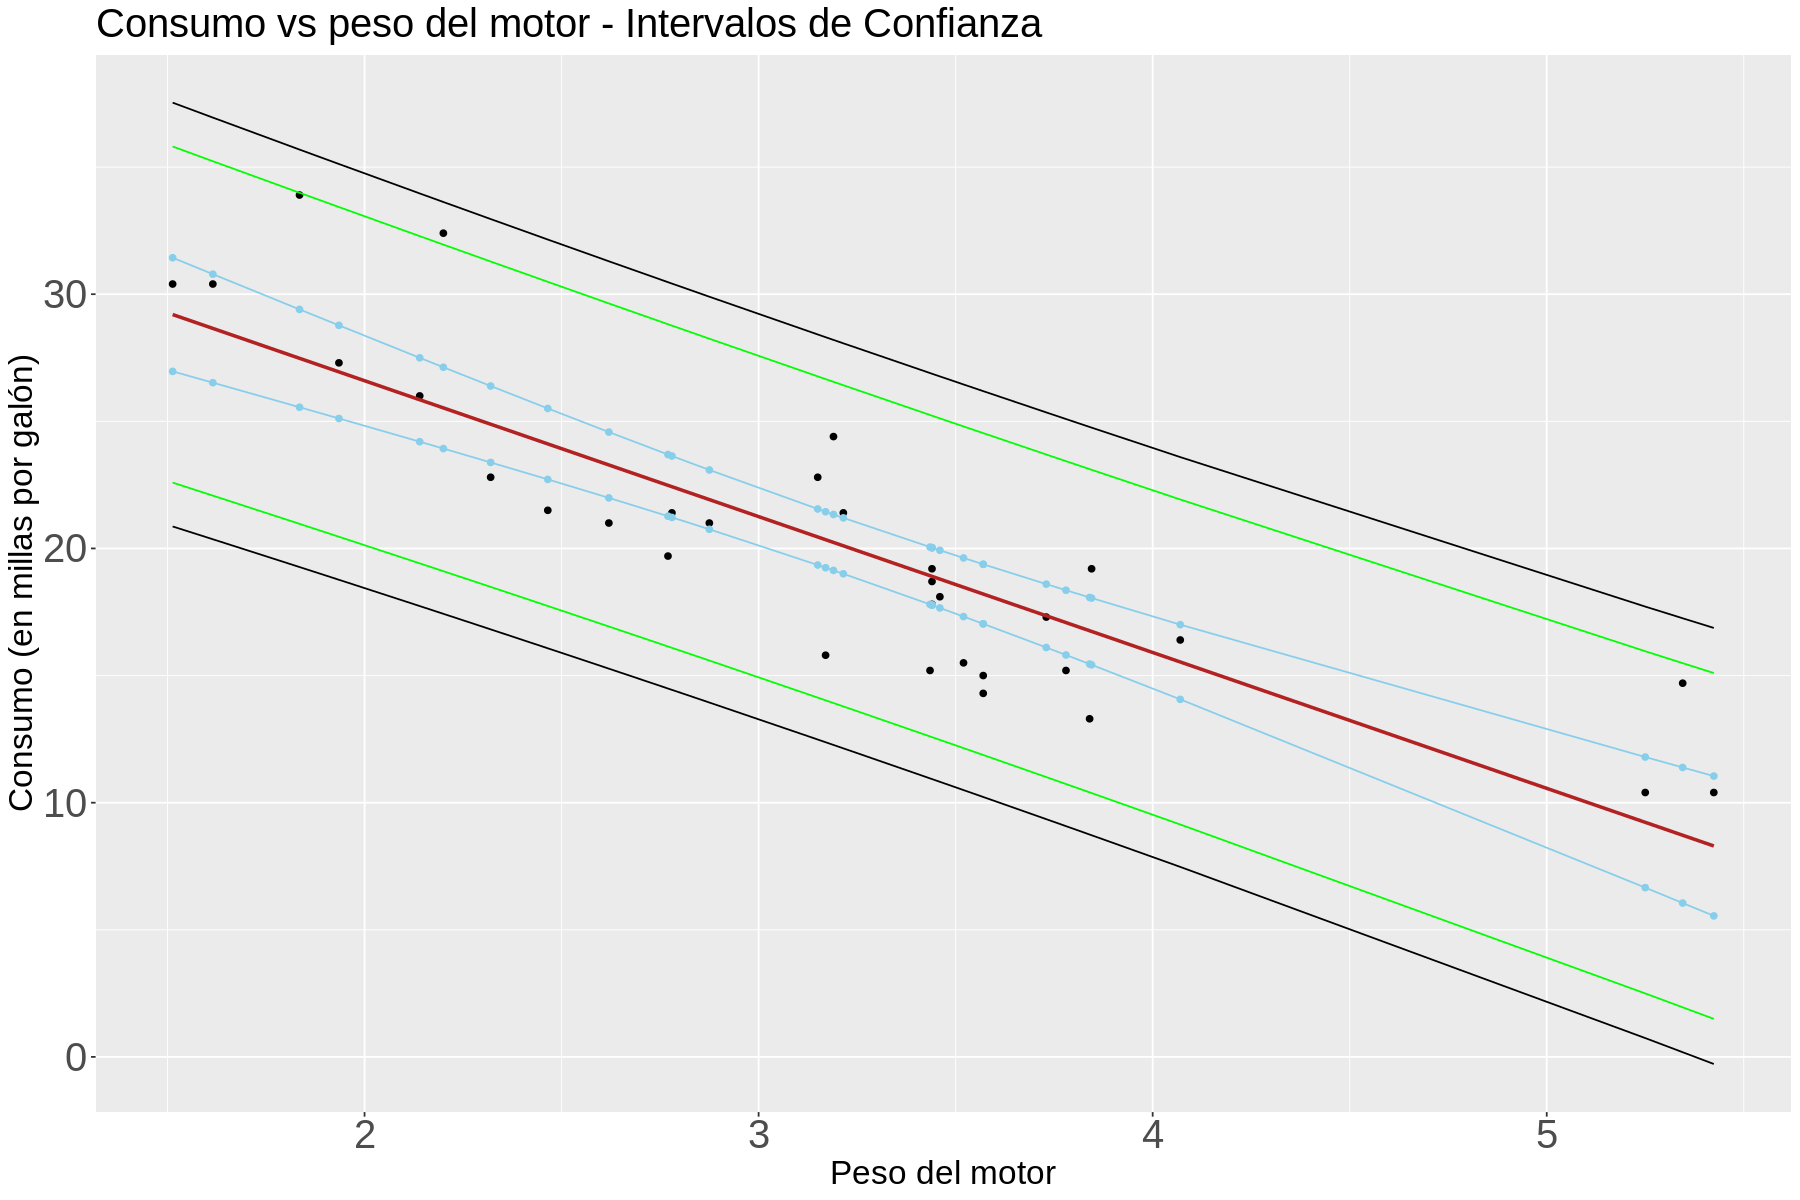

In [15]:
g <- g + geom_line(data = bandas_confianza_df, aes(x = peso_motor, y = lwr)) + 
         geom_line(data = bandas_confianza_df, aes(x = peso_motor, y = upr))
g

Notamos que la **banda de confianza** es significativamente mas ancha que las otras dos. Esto se debe a que estamos pidiendo que con un 95% de certeza asegurarnos que **todas las observaciones nuevas** caigan dentro de esa banda **simultáneamente**. Esto es significantemente más ambicioso que lo anterior y por eso tenemos este resultado.

## EXTRA: Cómo hallar los intervalos de confianza y prediccion sin _'predict'_

Como complemento de este ejercicio mostraremos cómo hallar los intervalos de confianza y de predicción sin utilizar la función predict de R.

**Empezamos buscando los elementos que necesitamos para hallar los intervalos:**

In [16]:
n <- nrow(mtcars)
X <- model.matrix(regresion_lineal)
A <- solve(t(X) %*% X)
p <- ncol(X)
cuantil_t <- qt(0.95,n-p)
s2 <- summary(regresion_lineal)$sigma^2

**Ahora creamos una matriz donde almacenaremos los intervalos de confianza que hallemos. Hacemos lo mismo para los de predicción.**

In [17]:
intervalos_confianza <- matrix(0 , nrow = n, ncol =  2)
intervalos_prediccion <- matrix(0 , nrow = n, ncol =  2)

**Hallamos los intervalos de confianza y predicción:**

In [18]:
for(i in 1:n){
    yi_hat <- regresion_lineal$fitted.values[i] 
    
    cota_inferior = yi_hat - qnorm() * sqrt( s2 * t(X[i,]) %*% A %*% X[i,] )
    cota_superior = yi_hat + qno * sqrt( s2 * t(X[i,]) %*% A %*% X[i,] )
    
    intervalos_confianza[i,]  <- c(cota_inferior, cota_superior)
}

In [19]:
for(i in 1:n){
    yi_hat <- regresion_lineal$fitted.values[i] 
    
    cota_inferior = yi_hat - cuantil_t * sqrt(s2) * sqrt(1 + t(X[i,]) %*% A %*% X[i,] )
    cota_superior = yi_hat + cuantil_t * sqrt(s2) * sqrt(1 + t(X[i,]) %*% A %*% X[i,] )
    
    intervalos_prediccion[i,]  <- c(cota_inferior, cota_superior)
}

**Intervalos de confianza:**

In [20]:
print(intervalos_confianza)

           [,1]     [,2]
 [1,] 22.207260 24.35796
 [2,] 20.949901 22.88964
 [3,] 23.636908 26.13500
 [4,] 19.188773 21.01653
 [5,] 17.962142 19.83815
 [6,] 17.850795 19.73571
 [7,] 17.232112 19.17861
 [8,] 19.322021 21.15050
 [9,] 19.533940 21.36614
[10,] 17.962142 19.83815
[11,] 17.962142 19.83815
[12,] 14.312477 16.75378
[13,] 16.314913 18.38558
[14,] 16.024562 18.14148
[15,]  7.092160 11.36114
[16,]  6.011912 10.58151
[17,]  6.502631 10.93522
[18,] 24.198007 26.85657
[19,] 26.879853 30.42776
[20,] 25.879380 29.07666
[21,] 22.951377 25.27063
[22,] 17.514618 19.43055
[23,] 17.989922 19.86381
[24,] 15.674058 17.85065
[25,] 15.644751 17.82651
[26,] 25.421825 28.46532
[27,] 24.476770 27.21914
[28,] 27.341360 31.05652
[29,] 19.428177 21.25813
[30,] 21.473322 23.48856
[31,] 17.232112 19.17861
[32,] 21.423837 23.43115


**Intervalos de predicción**

In [21]:
print(intervalos_prediccion)

           [,1]     [,2]
 [1,] 18.002296 28.56293
 [2,] 16.659923 27.17962
 [3,] 19.567544 30.20436
 [4,] 14.852839 25.35246
 [5,] 13.646079 24.15421
 [6,] 13.538392 24.04812
 [7,] 12.944891 23.46583
 [8,] 14.986387 25.48614
 [9,] 15.199842 25.70024
[10,] 13.646079 24.15421
[11,] 13.646079 24.15421
[12,] 10.221316 20.84494
[13,] 12.077936 22.62256
[14,] 11.806122 22.35993
[15,]  3.633673 14.81963
[16,]  2.644663 13.94876
[17,]  3.094220 14.34363
[18,] 20.189467 30.86511
[19,] 23.188253 34.11936
[20,] 22.066829 32.88921
[21,] 18.812883 29.40912
[22,] 13.214920 23.73025
[23,] 13.672990 24.18074
[24,] 11.479388 22.04532
[25,] 11.452133 22.01913
[26,] 21.554597 32.33255
[27,] 20.499546 31.19637
[28,] 23.705676 34.69221
[29,] 15.093149 25.59315
[30,] 17.214001 27.74788
[31,] 12.944891 23.46583
[32,] 17.161313 27.69368
